In [1]:
# Import our libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix, classification_report, recall_score, roc_auc_score

# Use inline so our visualizations display in notebook
%matplotlib inline

## Main Steps when building a Machine Learning Model. 
1. Inspect and explore data.
2. Select and engineer features.
3. Build and train model.
4. Evaluate model.

# #1 Inspect and explore data.
* Load titanic data
* Visualize all the data using sns.pairplot
* Check for null values

In [2]:
# Load in the titanic data set.
df_tit = pd.read_csv('data/titanic.csv')
df_tit.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Check for null values
df_tit.isnull().sum()

passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64

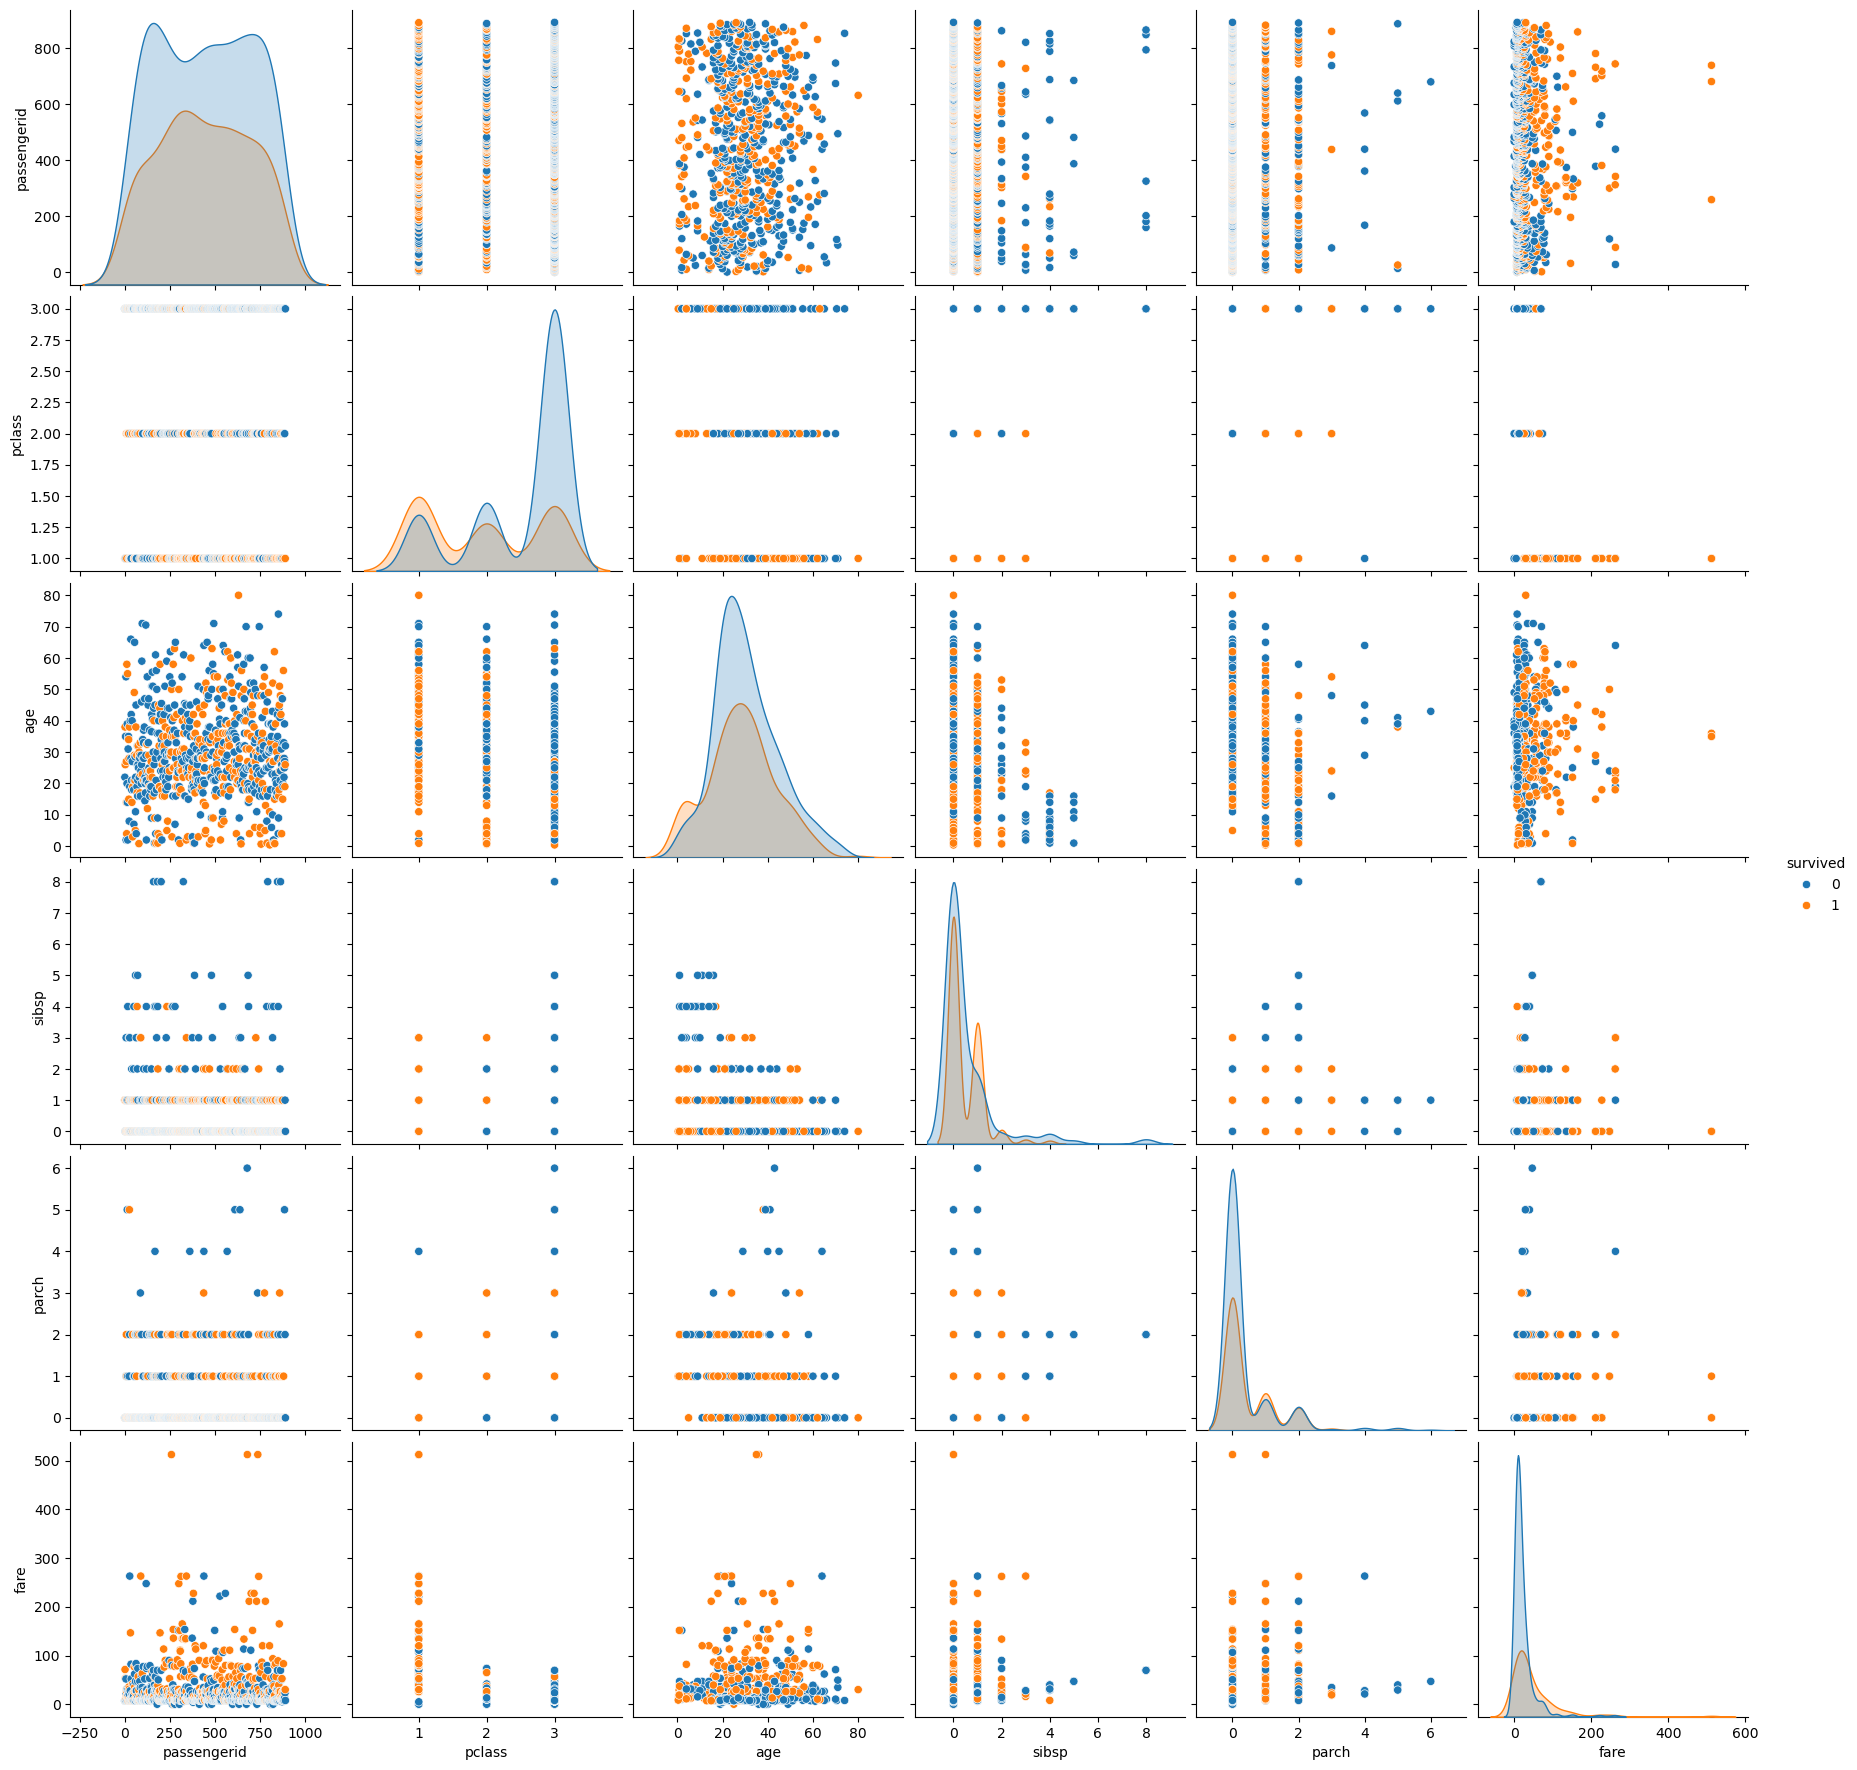

In [4]:
# Visualize all the data using sns.pairplot
sns.pairplot(df_tit, hue='survived', height=3)

# #2 Select and engineer features.
1. Fill age null values with -999
1. Convert to numerical values if need be by using `pd.get_dummies()`
1. Create a list of the features you are going to use.  In this case use as many or as little as you would like.
1. Define our `X` and `y`
1. Split our data into trainig and testing sets.

In [5]:
# Fill age null values with -999
df_tit['age'].fillna(-999)

df_tit['cabin'].fillna(-999)

0      -999
1       C85
2      -999
3      C123
4      -999
       ... 
886    -999
887     B42
888    -999
889    C148
890    -999
Name: cabin, Length: 891, dtype: object

In [6]:
df_tit['sex'].value_counts()

sex
male      577
female    314
Name: count, dtype: int64

In [7]:
df_tit['embarked'].value_counts()

embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [8]:
df_tit['pclass'].value_counts()

pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [9]:
# 1. Convert to numerical values if need be by using `pd.get_dummies()`
cols = ['sex', 'embarked', 'pclass']
df_tit = pd.get_dummies(df_tit, columns=cols)
df_tit.head()

,passengerid,survived,name,age,sibsp,parch,ticket,fare,cabin,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,pclass_1,pclass_2,pclass_3
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,False,True,False,False,True,False,False,True
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,True,False,True,False,False,True,False,False
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,True,False,False,False,True,False,False,True
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,True,False,False,False,True,True,False,False
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,False,True,False,False,True,False,False,True


In [10]:
# 2. Create a list of the features we are going to use.
selected_features = ['sex_female', 'sex_male', 'pclass_1', 'pclass_2', 'pclass_3']

In [11]:
# Define our `X` and `y`
X = df_tit[selected_features]
y = df_tit['survived']

In [12]:
# Split our data into trainig and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =.2, random_state=45)
print('Length of our Training data:', len(X_train),' ', len(y_train), '\nLength of our Testing data:', len(X_test), ' ', len(y_test))

Length of our Training data: 712   712 
Length of our Testing data: 179   179


# #3 Build and train model.
1. For our first pass, initialize our model with `max_depth=2`.
2. Fit our model with our training data. 
3. Make predictions of our testing data. 
4. Evaluate and print our model scores using accuracy, precision, recall, f1 scores, and auc scores. 
    * To calculate auc score you have to get the predicted probabilites for the Survived class using `model.predict_proba(X_test)[:,1]`
5. Visualize our Decision Tree using provided code. 


In [13]:
# For our first pass, initialize our model with `max_depth=2`.

model = DecisionTreeClassifier(max_depth=2)

In [14]:
# Fit our model with our training data. 

model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [15]:
# Make predictions of our testing data. 

pred = model.predict(X_test)
pred

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0])

In [16]:
# 4. Evaluate and print our model scores using accuracy, precision, recall, f1 scores, and auc scores. 
accuracy = accuracy_score(y_test, pred)
print("Accuracy Score: %f" % accuracy)

precision = precision_score(y_test, pred)
print("Precision Score: %f" % precision)

recall = recall_score(y_test, pred)
print("Recall Score: %f" % recall)

f1 = f1_score(y_test, pred)
print('F1 Score: %f' % f1)

Accuracy Score: 0.832402
Precision Score: 0.750000
Recall Score: 0.774194
F1 Score: 0.761905


In [17]:
# Calculate predicted probabilities
y_pred_proba = model.predict_proba(X_test)

# Keep only the proba for True
y_pred_proba = y_pred_proba[:,1]

# Compute auc score
auc = roc_auc_score(y_test, y_pred_proba)
print('AUC Score: %f' % auc)

AUC Score: 0.872622


In [18]:
# Confusion Matrix
confusion = confusion_matrix(y_test, pred)
print('Confusion Matrix:')
print(confusion)

# Classification Report
report = classification_report(y_test, pred)
print('Classification Report:')
print(report)

Confusion Matrix:
[[101  16]
 [ 14  48]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       117
           1       0.75      0.77      0.76        62

    accuracy                           0.83       179
   macro avg       0.81      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



# Visualize your tree

# Picking the right parameters...

# Parameter tuning of your Decision Tree using GridSearch or RandomizedSearch

### For assistance on this, look at Steves TA Tips code in `TA-Tips/random_forest_tuning.ipynb`


1. Make a dictionary of at least 3 parameters and a list of 3 values for each for your grid search. 
1. Initalize your GridSearchCV with a DecisionTreeClassifier, your param_grid, and what you are optimizing for.  Choose any of the five optimization strategies; accuracy, precision, recall, f1, or roc_auc.
1. Fit your GridSearchCV with your training data. 
1. Print the parameters of your best model. 
1. Evaluate your best model using accuracy, precision, recall, f1 scores, and auc scores. 
1. Visualize your best tree.
1. Which feature was your most important feature?

```python
tree.DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    class_weight=None,
    presort='deprecated',
    ccp_alpha=0.0,
)
```


[Tips on how to customize / set the paramters in the decision tree.](https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use)

In [19]:
# 1. Make a dictionary of at least 3 parameters and a list of 3 values for each for your grid search.from sklearn.model_selection import GridSearchCV
params = { 
    'max_depth': [2, 3, 4, 5], 
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3, 4]
}

In [20]:
# 1. Initalize your GridSearchCV with a DecisionTreeClassifier, your param_grid, and what you are optimizing for.  Choose any of the five optimization strategies; accuracy, precision, recall, f1, or roc_auc.
grid_search_cv = GridSearchCV(  
    estimator=model, 
    param_grid=params, 
    #cv=3, 
    scoring='accuracy'
)

In [21]:
# 1. Fit your GridSearchCV with your training data. 
grid_search_cv.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=2),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4, 5]},
             scoring='accuracy')

In [22]:
# 1. Print the parameters of your best model. 
# Print the best parameters it found
print( "Best Parameters:", grid_search_cv.best_params_)
print("Best Accuracy:", grid_search_cv.best_score_)

Best Parameters: {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Accuracy: 0.7654486358711711


In [23]:
# 1. Evaluate your best model using accuracy, precision, recall, f1 scores, and auc scores. 

# This command gives you the best tree
model = grid_search_cv.best_estimator_

# Now lets evaluate our model
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score: %f" % accuracy)

precision = precision_score(y_test, y_pred)
print("Precision Score: %f" % precision)

recall = recall_score(y_test, y_pred)
print("Recall Score: %f" % recall)

f1 = f1_score(y_test, y_pred)
print('F1 Score: %f' % f1)

# Calculate predicted probabilities, keep only probability for when class = 1
y_pred_proba = model.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test, y_pred_proba)
print('AUC Score: %f' % auc)

Accuracy Score: 0.832402
Precision Score: 0.750000
Recall Score: 0.774194
F1 Score: 0.761905
AUC Score: 0.872622


In [24]:
# 1. Which feature was your most important feature?
# Now lets look at our feature importances
feature_imp = pd.DataFrame.from_dict( {'feature_importance': model.feature_importances_,
                                       'feature':selected_features }).sort_values('feature_importance', ascending=False)
feature_imp

,feature_importance,feature
1,0.748869,sex_male
4,0.176071,pclass_3
2,0.075060,pclass_1
0,0.000000,sex_female
3,0.000000,pclass_2


# Now onto Random Forests...
Were going to do the same with, but this time with a random forest. Remeber... Repetition is the father of learning.

1. Make a dictionary of at least 3 parameters and a list of 3 values for each for your grid search. 
1. Initalize your GridSearchCV with a RandomForestClassifer, your param_grid, and what you are optimizing for.  Choose any of the five optimization strategies; accuracy, precision, recall, f1, or roc_auc.
1. Fit your GridSearchCV with your training data. 
1. Print the parameters of your best model. 
1. Evaluate your best model using accuracy, precision, recall, f1 scores, and auc scores. 
1. Which feature was your most important feature?


# Parameters of the Random Forest Classifier

```python
RandomForestClassifier(
    n_estimators=100,
    *,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
)
```

In [25]:
# 1. Make a dictionary of at least 3 parameters and a list of 3 values for each for your grid search. 
params = {
    'max_depth': [3, 5, 7],               
    'min_samples_split': [2, 5, 10],       
    'min_samples_leaf': [1, 3, 5]         
}


In [26]:
# 1. Initalize your GridSearchCV or RandomizedSearchCV with a RandomForestClassifer, your param_grid, and what you are optimizing for.  Choose any of the five optimization strategies; accuracy, precision, recall, f1, or roc_auc.

rf_model = RandomForestClassifier()

gs = GridSearchCV(
    estimator=rf_model,
    param_grid=params,
    scoring='accuracy',    
)


In [27]:
# 1. Fit your GridSearchCV with your training data. 
gs.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [28]:
# 1. Print the parameters of your best model. 
# Print the best parameters it found

print( "Best Parameters:", gs.best_params_)
print("Best Accuracy:", gs.best_score_)

Best Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Accuracy: 0.7654486358711711


In [29]:
# 1. Evaluate your best model using accuracy, precision, recall, f1 scores, and auc scores. 

# This command gives you tree that has the highest f1-score. 
model = grid_search_cv.best_estimator_


# Now lets evaluate our model
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score: %f" % accuracy)

precision = precision_score(y_test, y_pred)
print("Precision Score: %f" % precision)

recall = recall_score(y_test, y_pred)
print("Recall Score: %f" % recall)

f1 = f1_score(y_test, y_pred)
print('F1 Score: %f' % f1)

y_pred_proba = model.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test, y_pred_proba)
print('AUC Score: %f' % auc)

Accuracy Score: 0.832402
Precision Score: 0.750000
Recall Score: 0.774194
F1 Score: 0.761905
AUC Score: 0.872622


In [30]:
# 1. Which feature was your most important feature?
# Now lets look at our feature importances
feature_imp = pd.Series(model.feature_importances_,index=selected_features).sort_values(ascending=False)
feature_imp

sex_male      0.748869
pclass_3      0.176071
pclass_1      0.075060
sex_female    0.000000
pclass_2      0.000000
dtype: float64

# Build a random forest using the ny-vs-sf-housing.csv data. 
* Your target variable, aka the column you are trying to predict, aka your `y` variable is `in_sf`. 
* Can you get an accuracy above %88.8889?
* What was your most important feature?


In [31]:
df = pd.read_csv('data/ny-vs-sf-houses.csv')
df.head()

,in_sf,beds,bath,price,year_built,sqft,price_per_sqft,elevation
0,0,2.0,1.0,999000,1960,1000,999,10
1,0,2.0,2.0,2750000,2006,1418,1939,0
2,0,2.0,2.0,1350000,1900,2150,628,9
3,0,1.0,1.0,629000,1903,500,1258,9
4,0,0.0,1.0,439000,1930,500,878,10


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   in_sf           492 non-null    int64  
 1   beds            492 non-null    float64
 2   bath            492 non-null    float64
 3   price           492 non-null    int64  
 4   year_built      492 non-null    int64  
 5   sqft            492 non-null    int64  
 6   price_per_sqft  492 non-null    int64  
 7   elevation       492 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 30.9 KB


In [33]:
df.isna().sum()

in_sf             0
beds              0
bath              0
price             0
year_built        0
sqft              0
price_per_sqft    0
elevation         0
dtype: int64

In [34]:
df.duplicated().sum()
df = df.drop_duplicates()

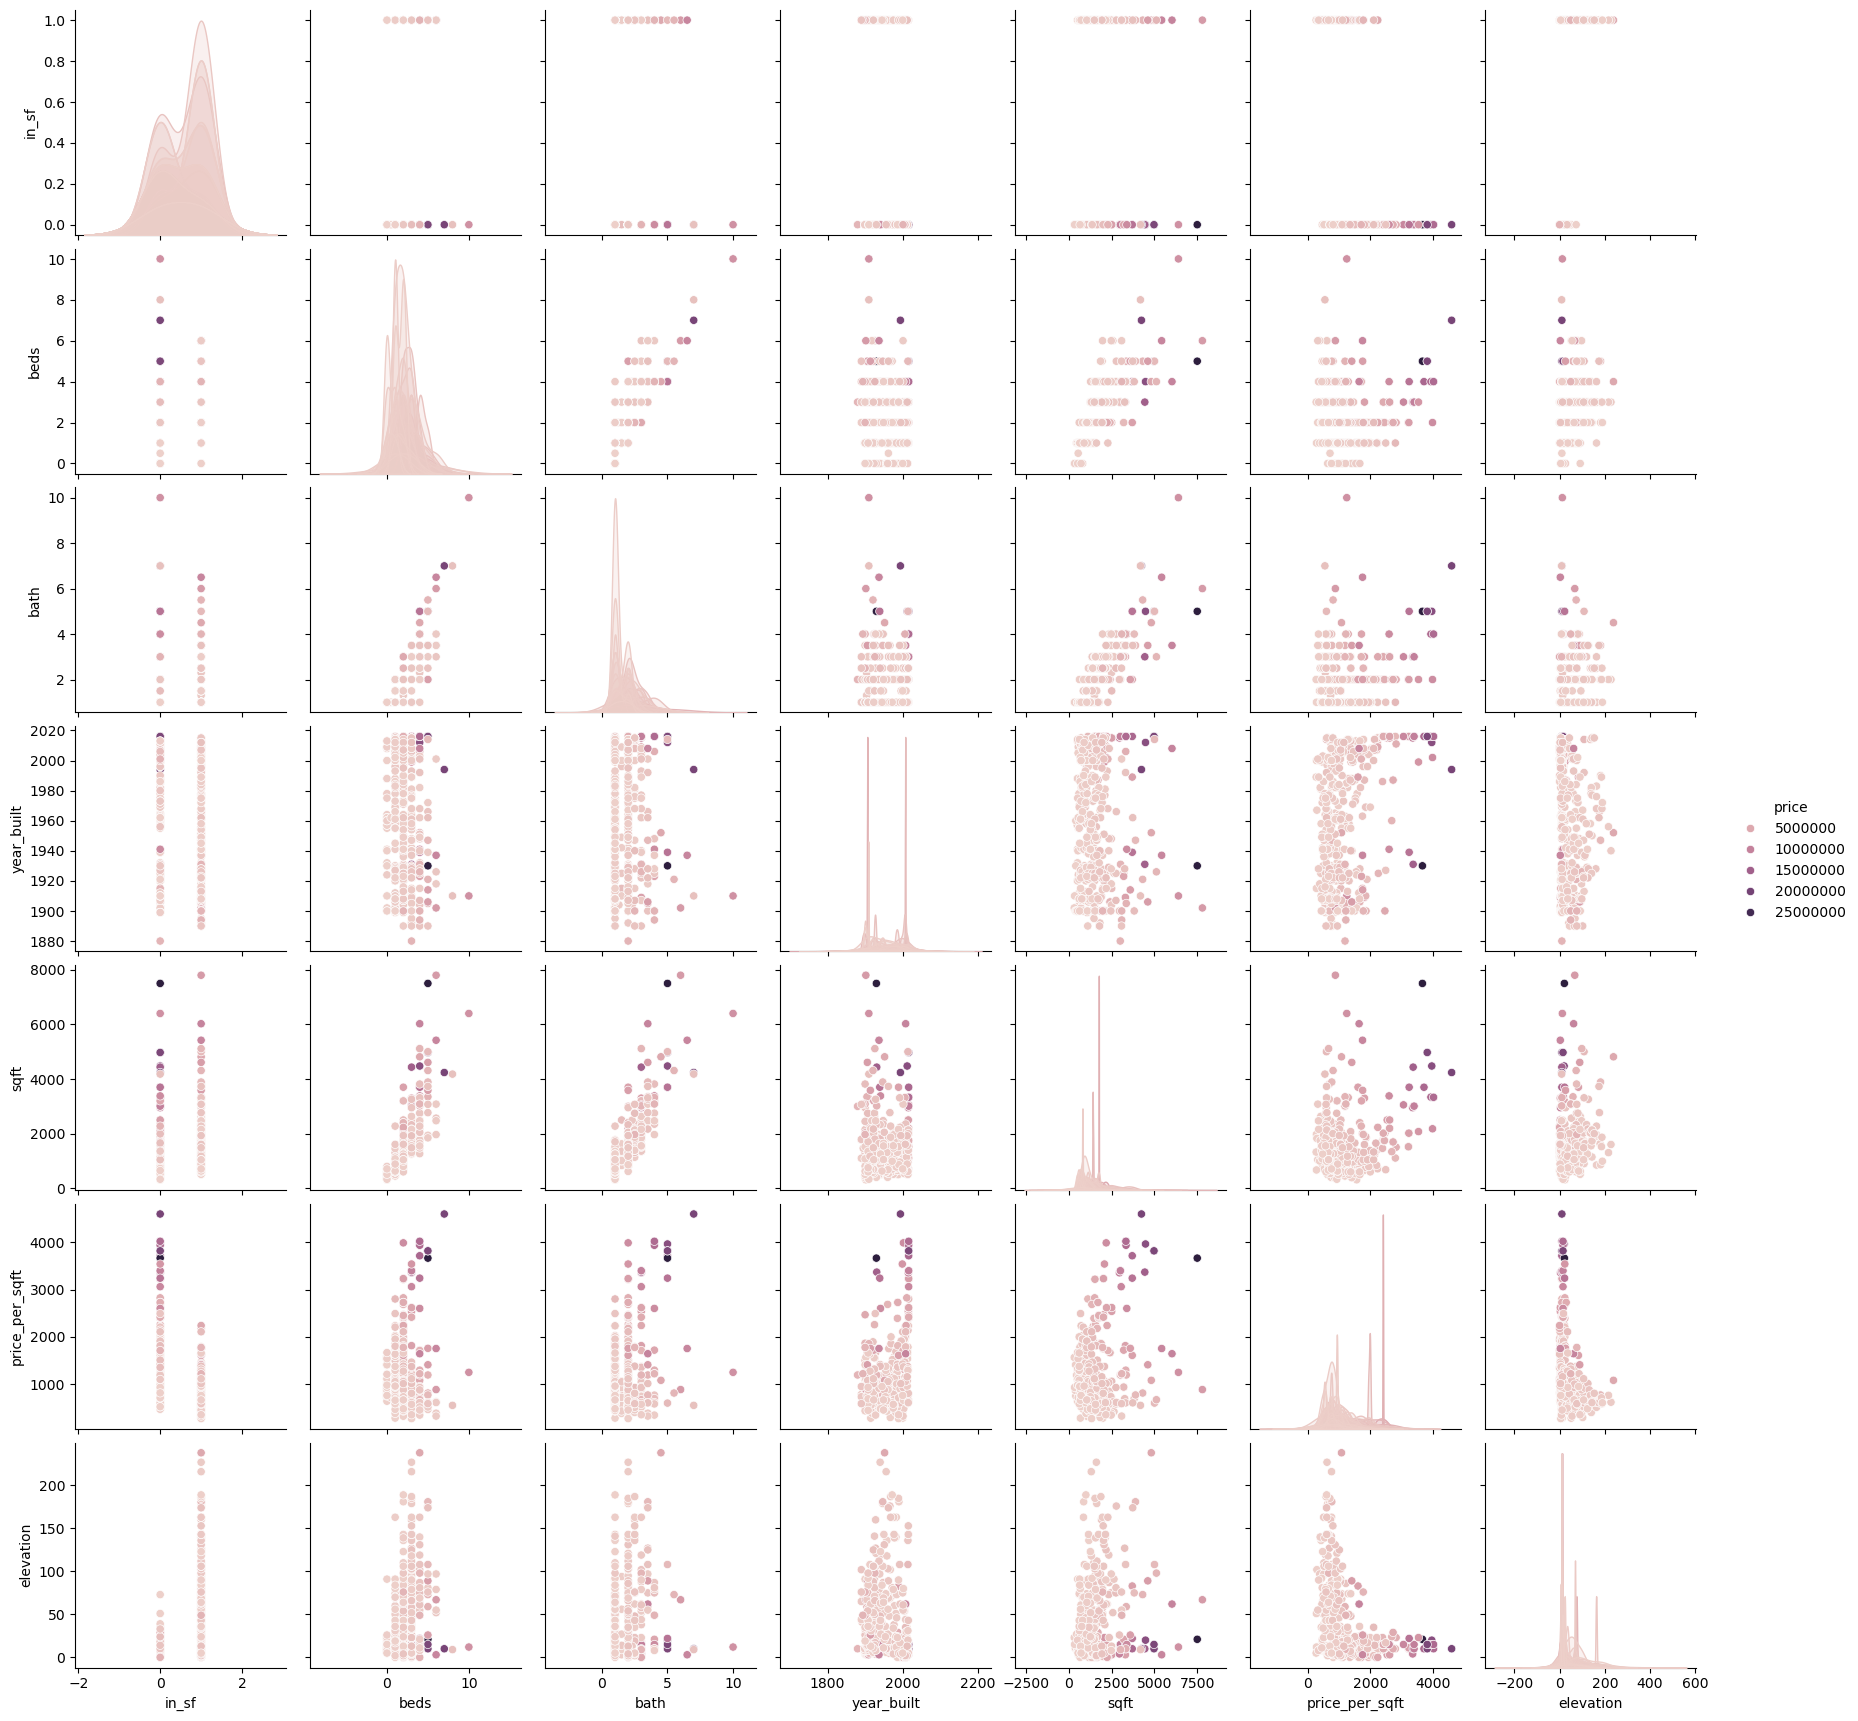

In [35]:
sns.pairplot(df, hue='price')

In [36]:
selected_f = ['year_built',	'sqft']
X = df[selected_f]
y = df['price']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =.2, random_state=45)

In [38]:
# BUILD, TRAIN, AND EVAULATE A RANDOM FOREST MODEL BELOW. 

model = RandomForestClassifier(n_estimators=100, max_depth=10)

model.fit(X_train, y_train)

pred = model.predict(X_test)
pred


array([ 3995000,  1650000,  1760000,   699000,   749000,   649000,
         895000,   549000,  1850000,   775000,   950000,  1249000,
        2999000, 13400000,  1250000,  1338800,  1725000,   779000,
         559900,   935000,   950000,  1475000,   910000,   699000,
         699000,   849000,   539000,  2235000,  2750000, 17750000,
        3995000,   350000,   688000,  3760000,   649000,   849000,
        1195000,   888000,   539000, 12000000,   699000,  1299000,
        1159000,   499999,  1965000,   699999,   910000,  7995000,
        1700000,   699000,   325000,  2750000,  1399000,  1725000,
        1599000,   350000,   469000,  4995000,  2300000,  2250000,
        1550000,   740200,   660000,   699000,   384900,  4875000,
         995000,  1895000,  3420000,   775000,   515000,  1995000,
         749000, 19000000,   539000,   699000,   699000,   749000,
         875000,  2799000,  4285000,   649000, 13150000,   699000,
        1650000,  1698000,  1550000,   539000,   697000,   995

In [39]:
accuracy = accuracy_score(y_test, pred)
print("Accuracy Score: %f" % accuracy)

precision = precision_score(y_test, pred, average='weighted')
print("Precision Score: %f" % precision)

recall = recall_score(y_test, pred, average='weighted')
print("Recall Score: %f" % recall)

f1 = f1_score(y_test, pred, average='weighted')
print('F1 Score: %f' % f1)

Accuracy Score: 0.173913
Precision Score: 0.136413
Recall Score: 0.173913
F1 Score: 0.147046


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [40]:
param_grid = {
    'n_estimators': [50, 100, 200],           
    'max_depth': [None, 10, 20],              
    'min_samples_split': [2, 5, 10],           
    'min_samples_leaf': [1, 2, 4]             
}


grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    scoring='accuracy',  
    cv=2
)


grid_search.fit(X_train, y_train)


best_model = grid_search.best_estimator_


print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", gs.best_score_)

y_pred = best_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)


print("\nClassification Report:\n", classification_report(y_test, y_pred))

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Best Accuracy: 0.7654486358711711
Accuracy Score: 0.14130434782608695

Classification Report:
               precision    recall  f1-score   support

      307000       0.00      0.00      0.00         1
      350000       0.00      0.00      0.00         0
      384900       0.00      0.00      0.00         0
      385000       0.00      0.00      0.00         1
      399000       0.00      0.00      0.00         0
      439000       0.00      0.00      0.00         1
      469000       0.00      0.00      0.00         0
      480000       0.00      0.00      0.00         1
      515000       0.00      0.00      0.00         0
      539000       0.25      1.00      0.40         1
      549000       0.00      0.00      0.00         0
      559900       0.00      0.00      0.00         0
      569000       0.00      0.00      0.00         1
      599000       0.00      0.00      0.00   

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/s

In [41]:
print('finished')

finished


# Awesome difficult extra credit below:
Build a classifier using the adult_income.csv data.  
* The target variable is 'class'
* Start with just using these features `selected_features = ['age', 'fnlwgt', 'capital_gain', 'capital_loss', 'hours_per_week']`
* You have to include the pos_label in your precision, recall, and f1 scores. It just tells the classifier which one is the posotive label.  I provided the proper way below.

* See if you can get above 50% f1 score.  
* See some [super tricks and tips here](https://www.kaggle.com/code/jieyima/income-classification-model)

In [42]:
df = pd.read_csv('data/adult_income.csv')
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
